<a href="https://colab.research.google.com/github/Mwikali-5/Life-Expectancy/blob/main/Project_Flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Classification Project:**

**The project should have the following:**

**1. Model features and preprocessing approaches**
**2. Different kinds of models (logistic regression, k-nearest neighbors, decision trees, etc.)**
**3. Different model hyperparameters**


**At minimum three models must be built:**
**1. Simple baseline model, in this case I will choose logistic regression**
**2. A complex model....random forest and XGBoost**
**3. Different model hyperparameters, so this means a grid search**


**For this project my target variable will be seasonal_vaccine so we are going to drop all the h1n1 variables since we will not be working with them.**

**Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both.**

The first column respondent_id is a unique and random identifier.

1. h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
2. h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
3. behavioral_antiviral_meds - Has taken antiviral medications. (binary)
4. behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
5. behavioral_face_mask - Has bought a face mask. (binary)
6. behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
7. behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
8. behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
9. behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
10. doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
11. doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
12. chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
13. child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
14. health_worker - Is a healthcare worker. (binary)
15. health_insurance - Has health insurance. (binary)
16. opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
17. opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
18. opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
19. opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
20. opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
21. opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
22. age_group - Age group of respondent.
23. education - Self-reported education level.
24. race - Race of respondent.
25. sex - Sex of respondent.
26. income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
27. marital_status - Marital status of respondent.
28. rent_or_own - Housing situation of respondent.
29. employment_status - Employment status of respondent.
30. hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
31. census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
32. household_adults - Number of other adults in household, top-coded to 3.
33. household_children - Number of children in household, top-coded to 3.
34. employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
35. employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read the data

training_features_data = pd.read_csv("/content/training_set_features.csv",
                    sep=',')


test_features_data = pd.read_csv("/content/test_set_features.csv",
                    sep=',')



training_set_labels = pd.read_csv("/content/training_set_labels.csv",
                    sep=',')

In [6]:
#data processing:

X = pd.read_csv("/content/training_set_features.csv", sep=',')
Y = pd.read_csv("/content/training_set_labels.csv", sep=',')

In [8]:
#check the shape of the X and Y
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (26707, 36)
Y shape:  (26707, 3)


There are 36 features(columns) in the training set
There are 3 columns in the target file. Since we are working with seasonal file, we can drop the h1n1 column

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [10]:
X.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [11]:
#joining X and Y into a single dataframe
Z = Y
Z.drop(columns = ['respondent_id'], axis = 1, inplace = True)
frames = [X, Z]
df = pd.concat(frames, axis = 1)

In [13]:
#checking for nulls
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [23]:
df['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


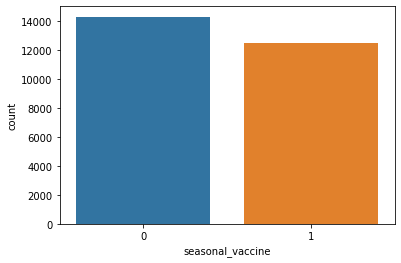

In [19]:
#since we are working with to determine how many people got the seasonal flu, we will drop the h1n1 vaccine
import seaborn as sns
sns.countplot('seasonal_vaccine',data=Y)

In [ ]:
#12435 people received the seasonal_vaccine. We want to check if they were correctly classified

In [5]:
training_features_data.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [28]:
# Data_visual=pd.concat([X, Y], axis=1)
df["count"]=1

In [29]:
def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]